#                                        IBM Data Science Capstone

# Battle of the Neighbourhoods

## Introduction

Air Pollution is a burning problem nowadays,especially in urban areas. So It is necessary to examine what is responsible for poor air quality. A good way to do that is to determine what differentiates the cities with Least polluted air from those with Most polluted air. In this project we've used population data and the internal surroundings of 16 such cities to determine what the difference is between the two groups. This study pretty much concerns every one, Because of the fact that everyone consumes air and is effected by it. **But the primary audience of this study is the City authorities and Urban Planners who are responsible for designing and Planning the structure of a city**,so that they have an insight on what could possibly lead to a City which is Pollution free.

## Problem Statement

The core question that we want to answer is **What is responsible for poor air quality in many Cities in the World?**
But in this study we will attempt to address 2 more specific Problems. These are:
1. **Do the internal structure and surroundings of these cities have a significant impact on Air Pollution? If it does, what kind of structures in a city correlates to the city being more polluted?**
2. **What role does population have in case of Pollution? Does Higher Population Density mean More Pollution?**

## Data

To understand and explore the following Open Data were used:
1. List of most-polluted cities by particulate matter concentration: https://en.wikipedia.org/wiki/List_of_most-polluted_cities_by_particulate_matter_concentration
2. A Comparative list of the Most and Least Polluted Cities in the World: https://www.rd.com/list/most-and-the-least-polluted-cities/
3. *Foursquare* Developers Access to venue data: https://foursquare.com/
4. Population Data from *Wikipedia*: https://en.wikipedia.org/wiki/List_of_cities_proper_by_population_density
5. Latitude & Longitude of Cities using *geopy* library: https://github.com/geopy/geopy

Using this data will allow exploration and examination to answer the questions. The venue data will be used to properly determine the common internal surroundings of each city and determine if there is some kind of correlation to pollution. The Population data will be used to compare the population density to examine if cities with higher pollution are also more densely populated. The lists of most polluted and least polluted cities will be used as reference. From these, we will use the 8 most polluted and 8 least polluted cities to compare the common venues within the cities retrieved from Foursquare location data and the population densities of the cities got from Wikipedia and other sources. The *geopy* library was used to extract the latitude & longitude values of the cities.

## Methodology

### Analytic Approach

There are 2 different stages in our Analysis. In the 1st stage we compare the common venues within the most polluted and least polluted cities and determine if these surroundings have any effect on pollution. In the 2nd stage we compare the population densities of those cities to determine if a higher population density results in more pollution.

#### First Stage:
1. Gathering all resources & importing necessary libraries.
2. Creating a list each for most & least polluted cities in the world using relevant data sources.
3. Getting the Latitude & Longitude values of the cities using Python geocoder library an putting all the data in a dataframe.
4. Finding out all the nearby venues within a certain radius in each city,categorizing them & putting all the results in a dataframe.
5. Finding out the most common venues from each city using Python pandas toolkit.
6. Comparing the common venues to find out if there is any pattern of differences between the most & least polluted cities.

#### Second Stage:
1. Gathering the population densities of all the listed cities and creating a dataframe using this data.
2. Creating a visualization of the population data using the dataframe, separating most polluted & least polluted cities.
3. Using the visualization,finding out if higher population density in cities corresponds to more pollution.

### Exploratory Data Analysis

## Importing Necessary Libraries

In [1]:
import pandas as pd # library for data analysis
import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML documents
import numpy as np
import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


## Creating Dataframe

In [30]:
Polluted_Cities = ['Delhi, India','Faisalabad, Pakistan','Hotan, China','Dhaka, Bangladesh','Manama, Bahrain','Kabul, Afghanistan','Ulaanbaatar, Mongolia','Kuwait City, Kuwait']
Least_Polluted_Cities = ['Honolulu, Hawaii','Zurich, Switzerland','Adelaide, Australia','Calgary, Canada','Helsinki, Finland','Reykjavík, Iceland','Hamburg, Germany','Wellington, New Zealand']

In [31]:
mp_latitude = []
mp_longitude = []
lp_latitude = []
lp_longitude = []

for address in Polluted_Cities:
    geolocator = Nominatim(user_agent="pollution_explorer")
    location = geolocator.geocode(address)
    mp_latitude.append(location.latitude)
    mp_longitude.append(location.longitude)
    
for address in Least_Polluted_Cities:
    geolocator = Nominatim(user_agent="pollution_explorer")
    location = geolocator.geocode(address)
    lp_latitude.append(location.latitude)
    lp_longitude.append(location.longitude)  

### Most Polluted Cities

In [32]:
Polluted_df = pd.DataFrame(Polluted_Cities,columns =['Cities'])
Polluted_df['Latitude'] = mp_latitude
Polluted_df['Longitude'] = mp_longitude
Polluted_df

,Cities,Latitude,Longitude
0,"Delhi, India",28.651718,77.221939
1,"Faisalabad, Pakistan",31.422056,73.092325
2,"Hotan, China",37.114464,79.919681
3,"Dhaka, Bangladesh",23.810651,90.412647
4,"Manama, Bahrain",26.223504,50.582244
5,"Kabul, Afghanistan",34.526011,69.177684
6,"Ulaanbaatar, Mongolia",47.918468,106.917702
7,"Kuwait City, Kuwait",29.379709,47.973563


### Least Polluted Cities

In [33]:
Least_Polluted_df = pd.DataFrame(Least_Polluted_Cities,columns =['Cities'])
Least_Polluted_df['Latitude'] = lp_latitude
Least_Polluted_df['Longitude'] = lp_longitude
Least_Polluted_df

,Cities,Latitude,Longitude
0,"Honolulu, Hawaii",21.304547,-157.855676
1,"Zurich, Switzerland",47.374449,8.541042
2,"Adelaide, Australia",-34.928181,138.599931
3,"Calgary, Canada",51.053423,-114.062589
4,"Helsinki, Finland",60.167488,24.942747
5,"Reykjavík, Iceland",64.145981,-21.942237
6,"Hamburg, Germany",53.550341,10.000654
7,"Wellington, New Zealand",-41.288795,174.777211


## Define Foursquare Credentials and Version

In [34]:
CLIENT_ID = 'TYHKFW03TJYEM3X1JTKGVM0GXEJF1T3P4F5EBT3W21EOU0CZ' # my Foursquare ID
CLIENT_SECRET = 'DKC2UPMRVLHEBIZISCVMCXRIKNVLUKQCOLXFKILDI1STBQ1X' # my Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('My credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
CLIENT_ID: TYHKFW03TJYEM3X1JTKGVM0GXEJF1T3P4F5EBT3W21EOU0CZ
CLIENT_SECRET:DKC2UPMRVLHEBIZISCVMCXRIKNVLUKQCOLXFKILDI1STBQ1X


## Explore all Cities
Let's create a function to get the venues within a certain Radius

In [35]:
def getNearbyVenues(names, latitudes, longitudes, radius=5000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Most Polluted Cities

In [36]:
polluted_venues = getNearbyVenues(names=Polluted_df['Cities'],
                                   latitudes=Polluted_df['Latitude'],
                                   longitudes=Polluted_df['Longitude']
                                  )

Delhi, India
Faisalabad, Pakistan
Hotan, China
Dhaka, Bangladesh
Manama, Bahrain
Kabul, Afghanistan
Ulaanbaatar, Mongolia
Kuwait City, Kuwait


In [37]:
polluted_venues

,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Delhi, India",28.651718,77.221939,Amritsari Lassi Wala,28.657325,77.224138,Snack Place
1,"Delhi, India",28.651718,77.221939,Jolly Creations Designer Boutique,28.662689,77.226300,Boutique
2,"Delhi, India",28.651718,77.221939,Haveli Dharampura,28.653247,77.232309,Hotel
3,"Delhi, India",28.651718,77.221939,Naturals Ice Cream,28.634455,77.222139,Ice Cream Shop
4,"Delhi, India",28.651718,77.221939,Spice Market,28.657287,77.222595,Food & Drink Shop
...,...,...,...,...,...,...,...
504,"Kuwait City, Kuwait",29.379709,47.973563,His Majesty The Coffee,29.381494,47.993029,Café
505,"Kuwait City, Kuwait",29.379709,47.973563,Savage Coffee Bar,29.374179,47.984571,Café
506,"Kuwait City, Kuwait",29.379709,47.973563,Courtyard Marriott,29.377580,47.990664,Hotel
507,"Kuwait City, Kuwait",29.379709,47.973563,Soul Coffee House,29.380683,47.992802,Coffee Shop


### Least Polluted Cities

In [38]:
Least_polluted_venues = getNearbyVenues(names=Least_Polluted_df['Cities'],
                                   latitudes=Least_Polluted_df['Latitude'],
                                   longitudes=Least_Polluted_df['Longitude']
                                  )

Honolulu, Hawaii
Zurich, Switzerland
Adelaide, Australia
Calgary, Canada
Helsinki, Finland
Reykjavík, Iceland
Hamburg, Germany
Wellington, New Zealand


In [39]:
Least_polluted_venues

,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Honolulu, Hawaii",21.304547,-157.855676,Honolulu Museum of Art,21.303687,-157.848598,Art Museum
1,"Honolulu, Hawaii",21.304547,-157.855676,‘Iolani Palace,21.306702,-157.859083,Monument / Landmark
2,"Honolulu, Hawaii",21.304547,-157.855676,Yanagi Sushi,21.300900,-157.853968,Japanese Restaurant
3,"Honolulu, Hawaii",21.304547,-157.855676,Arvo,21.298634,-157.861077,Coffee Shop
4,"Honolulu, Hawaii",21.304547,-157.855676,Bar Leather Apron,21.308298,-157.863644,Cocktail Bar
...,...,...,...,...,...,...,...
795,"Wellington, New Zealand",-41.288795,174.777211,Bethel Woods,-41.281243,174.775058,BBQ Joint
796,"Wellington, New Zealand",-41.288795,174.777211,Victoria Street Farmers' Market,-41.293560,174.772766,Farmers Market
797,"Wellington, New Zealand",-41.288795,174.777211,Deluxe Espresso Bar,-41.294124,174.783600,Coffee Shop
798,"Wellington, New Zealand",-41.288795,174.777211,Cable Car Museum,-41.285307,174.767741,Museum


In [40]:
print('There are {} uniques categories.'.format(len(polluted_venues['Venue Category'].unique())))

There are 137 uniques categories.


In [41]:
print('There are {} uniques categories.'.format(len(Least_polluted_venues['Venue Category'].unique())))

There are 180 uniques categories.


## Analyzing Each City

### Most Polluted Cities

In [42]:
# one hot encoding
polluted_onehot = pd.get_dummies(polluted_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
polluted_onehot['City'] = polluted_venues['City'] 

# move neighborhood column to the first column
#fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
#toronto_onehot = toronto_onehot[fixed_columns]

polluted_onehot.head()

,Afghan Restaurant,Airport Lounge,Airport Terminal,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Tech Startup,Thai Restaurant,Theater,Tibetan Restaurant,Trail,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Xinjiang Restaurant,City
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"Delhi, India"
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"Delhi, India"
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"Delhi, India"
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"Delhi, India"
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"Delhi, India"


### Least Polluted Cities

In [43]:
# one hot encoding
Least_polluted_onehot = pd.get_dummies(Least_polluted_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Least_polluted_onehot['City'] = Least_polluted_venues['City'] 

# move neighborhood column to the first column
#fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
#toronto_onehot = toronto_onehot[fixed_columns]

Least_polluted_onehot.head()

,Afghan Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Australian Restaurant,BBQ Joint,...,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Watch Shop,Waterfront,Wine Bar,Wine Shop,Winery,Yoga Studio,Zoo,City
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"Honolulu, Hawaii"
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"Honolulu, Hawaii"
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"Honolulu, Hawaii"
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"Honolulu, Hawaii"
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"Honolulu, Hawaii"


## Next, let's group rows by City and by taking the mean of the frequency of occurrence of each category

### Most Polluted Cities

In [44]:
polluted_grouped = polluted_onehot.groupby('City').mean().reset_index()
polluted_grouped

,City,Afghan Restaurant,Airport Lounge,Airport Terminal,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,...,Tapas Restaurant,Tech Startup,Thai Restaurant,Theater,Tibetan Restaurant,Trail,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Xinjiang Restaurant
0,"Delhi, India",0.000000,0.000000,0.000000,0.00,0.00,0.01,0.02,0.01,0.000000,...,0.00,0.000000,0.000000,0.01,0.01,0.00,0.000000,0.00,0.00,0.000000
1,"Dhaka, Bangladesh",0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.018182,...,0.00,0.018182,0.018182,0.00,0.00,0.00,0.000000,0.00,0.00,0.000000
2,"Faisalabad, Pakistan",0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,...,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.000000
3,"Hotan, China",0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,...,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.222222
4,"Kabul, Afghanistan",0.090909,0.045455,0.090909,0.00,0.00,0.00,0.00,0.00,0.000000,...,0.00,0.000000,0.000000,0.00,0.00,0.00,0.045455,0.00,0.00,0.000000
5,"Kuwait City, Kuwait",0.000000,0.000000,0.000000,0.04,0.01,0.00,0.00,0.00,0.000000,...,0.01,0.000000,0.010000,0.00,0.01,0.00,0.010000,0.00,0.01,0.000000
6,"Manama, Bahrain",0.000000,0.000000,0.000000,0.03,0.00,0.00,0.00,0.00,0.000000,...,0.00,0.000000,0.020000,0.00,0.00,0.00,0.020000,0.00,0.00,0.000000
7,"Ulaanbaatar, Mongolia",0.000000,0.000000,0.000000,0.01,0.00,0.00,0.00,0.00,0.000000,...,0.00,0.000000,0.000000,0.01,0.00,0.01,0.000000,0.01,0.00,0.000000


### Least Polluted Cities

In [45]:
Least_polluted_grouped = Least_polluted_onehot.groupby('City').mean().reset_index()
Least_polluted_grouped

,City,Afghan Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Australian Restaurant,...,Tunnel,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Watch Shop,Waterfront,Wine Bar,Wine Shop,Winery,Yoga Studio,Zoo
0,"Adelaide, Australia",0.01,0.01,0.00,0.01,0.00,0.00,0.00,0.02,0.03,...,0.00,0.00,0.01,0.00,0.00,0.02,0.01,0.01,0.00,0.01
1,"Calgary, Canada",0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.01,0.00,...,0.00,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00
2,"Hamburg, Germany",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,...,0.01,0.00,0.01,0.00,0.00,0.02,0.00,0.00,0.00,0.00
3,"Helsinki, Finland",0.00,0.01,0.01,0.00,0.01,0.00,0.00,0.01,0.00,...,0.00,0.01,0.00,0.00,0.00,0.03,0.01,0.00,0.01,0.00
4,"Honolulu, Hawaii",0.00,0.03,0.00,0.00,0.00,0.01,0.00,0.00,0.00,...,0.00,0.00,0.02,0.00,0.00,0.01,0.00,0.00,0.00,0.00
5,"Reykjavík, Iceland",0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00
6,"Wellington, New Zealand",0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,...,0.00,0.00,0.01,0.00,0.01,0.01,0.00,0.00,0.00,0.01
7,"Zurich, Switzerland",0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.01,0.00,...,0.00,0.05,0.00,0.01,0.01,0.00,0.01,0.00,0.00,0.00


## Results

## Let's print each City along with the top 10 most common venues

### Least Polluted Cities

In [46]:
num_top_venues = 10

for hood in Least_polluted_grouped['City']:
    print("----"+hood+"----")
    temp = Least_polluted_grouped[Least_polluted_grouped['City'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide, Australia----
                   venue  freq
0                  Hotel  0.07
1                   Café  0.06
2                    Pub  0.06
3            Coffee Shop  0.05
4                    Bar  0.04
5                   Park  0.04
6           Cocktail Bar  0.03
7  Australian Restaurant  0.03
8                 Garden  0.03
9            Pizza Place  0.02


----Calgary, Canada----
                venue  freq
0          Restaurant  0.08
1         Coffee Shop  0.05
2          Steakhouse  0.04
3         Pizza Place  0.03
4       Deli / Bodega  0.03
5                 Pub  0.03
6  Italian Restaurant  0.03
7                Park  0.03
8              Bakery  0.03
9               Diner  0.03


----Hamburg, Germany----
            venue  freq
0            Café  0.09
1            Park  0.08
2     Coffee Shop  0.07
3           Plaza  0.04
4    Cocktail Bar  0.04
5     Supermarket  0.03
6           Hotel  0.03
7          Bakery  0.03
8         Theater  0.03
9  Farmers Market  0.02


----

### Most Polluted Cities

In [47]:
num_top_venues = 10

for hood in polluted_grouped['City']:
    print("----"+hood+"----")
    temp = polluted_grouped[polluted_grouped['City'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Delhi, India----
                  venue  freq
0     Indian Restaurant  0.18
1                 Hotel  0.07
2                  Café  0.06
3                Lounge  0.04
4     Food & Drink Shop  0.03
5           Snack Place  0.03
6           Coffee Shop  0.03
7  Fast Food Restaurant  0.02
8                Bakery  0.02
9    Chinese Restaurant  0.02


----Dhaka, Bangladesh----
                venue  freq
0                Café  0.13
1         Coffee Shop  0.11
2               Hotel  0.07
3      Clothing Store  0.05
4   Indian Restaurant  0.05
5           Nightclub  0.04
6      Ice Cream Shop  0.04
7  Seafood Restaurant  0.02
8  Italian Restaurant  0.02
9           Hotel Bar  0.02


----Faisalabad, Pakistan----
                  venue  freq
0  Fast Food Restaurant  0.13
1           Pizza Place  0.13
2                  Café  0.13
3         Shopping Mall  0.09
4            Restaurant  0.09
5        Ice Cream Shop  0.09
6                 Hotel  0.04
7          Burger Joint  0.04
8           

### As we can see, despite being far apart in terms of Pollution,all 16 cities have pretty much same types of venues consisting of Restaurants,Hotels,Coffee Shops etc. So it can be concluded that Pollution must correlated to something other than the internal surroundings of a City.

### Let's check Population Density of each City from www.wikipedia.com

In [51]:
Pop_density_Cities = pd.DataFrame(Polluted_Cities + Least_Polluted_Cities, columns = ['City'])
# Filling up the Population Density column by manually searching through Wikipedia and other public sources.
Pop_density_Cities['Population Density'] = [29259.12,2500,850,75290,21000,16100,350,20500,5664,4700,412.84,1501.1,3070,480,2400,710]
Pop_density_Cities

,City,Population Density
0,"Delhi, India",29259.12
1,"Faisalabad, Pakistan",2500.00
2,"Hotan, China",850.00
3,"Dhaka, Bangladesh",75290.00
4,"Manama, Bahrain",21000.00
5,"Kabul, Afghanistan",16100.00
6,"Ulaanbaatar, Mongolia",350.00
7,"Kuwait City, Kuwait",20500.00
8,"Honolulu, Hawaii",5664.00
9,"Zurich, Switzerland",4700.00


## Plotting the Population Density of each City

In [52]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


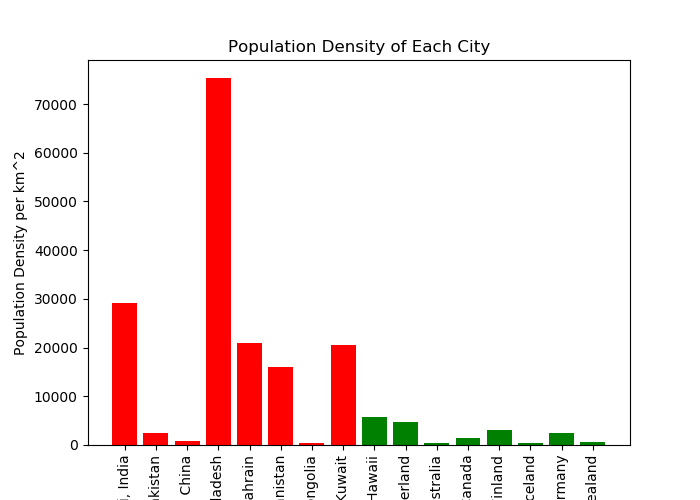

In [71]:
plt.figure(figsize=(7,5))
plt.bar(Pop_density_Cities['City'],Pop_density_Cities['Population Density'],color = ('r','r','r','r','r','r','r','r','g','g','g','g','g','g','g','g'))
plt.xticks(Pop_density_Cities['City'], rotation='vertical')
plt.title('Population Density of Each City')
plt.ylabel('Population Density per km^2')
plt.savefig('Pop_Density.pdf',bbox_inches='tight')

### Here, Red bars represent Most Polluted Cities & Green ones represent Least Polluted Cities. As we can see, Cities with higher Population Density tend to be more polluted. This is one of the reasons of pollution and it correlates much more than the internal surroundings of a City to Pollution.

## Discussions

1. One important drawback of analyzing with common location data is that **it doesn't account for relative weights of the venues**. For example it gives equal weight to a tannery and a coffee shop. But clearly a tannery is a way more significant venue than a coffee shop,specially in our case. **So it is recommended to address this issue in future studies and if possible come up with a way to single out important venues like tanneries or factories.**
2. The radius limitation gives rise to a problem too. In many cases the entities responsible for air pollution are situated at the edge of the cities. So our analysis can't properly include them. **It is recommended to address this issue in future studies too.**
3. In case of population density, even though in most cases a higher population density means more pollution, there are some pretty significant outliers too. For example Honolulu has a way higher population density than Hotan despite being much less polluted. So clearly population density alone can't explain pollution. Other factors, like Waste Management systems should be considered as pointed out in our data sources. **It is recommended to study what other factors in a city leads to more pollution in future works.**

## Conclusion

In this study, a comprehensive approach was taken to study what factors are behind air pollution in many cities. Analyzing location,common venues and population data of **8 Most Polluted** & **8 Least Polluted** cities, we can share at least 2 concluding remarks:
1. **The most common structures and venues within a city are pretty much the same in most of them and they have little effect in making a city a polluted one. Some significant venues might seem to be exceptions but the regular surroundings have little to no impact in this case, hence uncorrelated to pollution.** 
2. **Even though there can be many other factors, Densely populated cities tend to be more polluted than less densely populated cities. So, there is a positive correlation between population density & pollution.**

City authorities and Urban planners should take note of these remarks,plan accordingly and there should be further study in order to solve the problem of air pollution in big cities.